# Syllabus

Notebook to demonstrate how to run a backtest with GekkoPy.

Make sure Gekko is running!

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import requests
from pprint import pprint
from gekkopy.gekko_client import GekkoClient
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

Populating the interactive namespace from numpy and matplotlib


# Config

In [2]:
url = 'http://localhost:3000'

# Initialize Gekko Client

In [3]:
gekko = GekkoClient(url)

# Strategy and Backtest Config

In [4]:
macd_cfg = {
    'short': 10,
    'long': 21,
    'signal': 9,
    'thresholds': {
        'down': -0.025,
        'up': 0.025,
        'persistence': 1,
    }
}
bt_config = gekko.build_backtest_config(
    exchange='binance', 
    asset='BTC', 
    currency='USDT', 
    candlesize=360, 
    strategy='MACD',
    strat_config=macd_cfg, 
    date_start='2019-01-01', 
    date_end='2019-06-01'
)

# Run the backtest

In [5]:
report, jdf, profits = gekko.backtest(bt_config)

# Results

## Report
The report contains high level statistics as returned by Gekko:

In [6]:
report

{'startTime': '2019-02-19 23:59:00',
 'endTime': '2019-06-01 00:01:00',
 'timespan': '3 months',
 'market': 118.83289531934932,
 'balance': 5605.98664554,
 'profit': 1598.1966455399997,
 'relativeProfit': 39.87725518402908,
 'yearlyProfit': 5779.418924137776,
 'relativeYearlyProfit': 144.20463457760448,
 'startPrice': 3699.94,
 'endPrice': 8551.53,
 'trades': 34,
 'startBalance': 4007.79,
 'exposure': 0.4925674839454903,
 'sharpe': 13.77354874158137,
 'downside': -2.5799428969375042,
 'alpha': 1479.3637502206504}

## Profit
The profits are aggregated statistics per month.

* fcurrentBalance, lcurrentBalance: balance on first and last day of month
* fclose, lclose: closing price on first and last day of month
* marketProfit, stratProfit: relative profit of market and strategy during the month

In [7]:
profits

,fcurrentBalance,fclose,lcurrentBalance,lclose,marketProfit,stratProfit
2019-01-31,4007.790000,3699.94,4007.790000,3434.10,-0.071850,0.000000
2019-02-28,4007.790000,3419.81,3637.272743,3813.69,0.115176,-0.092449
2019-03-31,3648.193078,3825.14,3596.587239,4103.95,0.072889,-0.014146
2019-04-30,3623.667136,4134.85,4301.169445,5320.81,0.286821,0.186966
2019-05-31,4313.139365,5348.99,5605.986646,8555.00,0.599367,0.299746


## Joint DataFrame

All information about the trades, plus calculated profit etc.

In [13]:
jdf.loc['2019-05-21':'2019-05-22']

,close,high,low,open,ind_macd,action,adviceId,amount,balance,cost,effectivePrice,feePercent,id,portfolio,price,entryBalance,exitBalance,lastAction,lastAmount,lastBalance,profit,currentBalance,marketP,stratP,marketMax,stratMax,marketDrawdown,stratDrawdown,date
start,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-21 00:00:00,7874.94,7998.00,7790.05,7937.16,6.672743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buy,0.756233,6027.125986,-0.017084,5955.291391,2.128397,1.485929,2.208109,1.54309,-0.036100,-0.037043,2019-05-21 00:00:00
2019-05-21 06:00:00,7848.37,7980.90,7771.00,7874.91,-1.045374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,buy,0.756233,6027.125986,-0.007181,5935.198274,2.121215,1.480915,2.208109,1.54309,-0.039352,-0.040292,2019-05-21 06:00:00
2019-05-21 12:00:00,7962.55,7971.00,7793.38,7847.92,1.328789,sell,advice-28,0.754343,5920.360278,14.837996,7828.749075,0.25,trade-28,"{'asset': 0, 'currency': 5605.98664554}",7848.37,NaN,5920.360278,sell,0.754343,5920.360278,-0.000000,5920.360278,2.152075,1.477213,2.208109,1.54309,-0.025376,-0.042691,2019-05-21 12:00:00
2019-05-21 18:00:00,7904.87,8042.32,7865.20,7960.05,-2.948071,buy,advice-29,0.741667,5905.559376,14.800901,7942.643625,0.25,trade-29,"{'asset': 0, 'currency': 5605.98664554}",7962.55,5905.559376,NaN,buy,0.741667,5905.559376,-0.015589,5862.780033,2.136486,1.462846,2.208109,1.54309,-0.032436,-0.052002,2019-05-21 18:00:00
2019-05-22 00:00:00,7921.09,7988.00,7830.23,7904.48,-5.522576,sell,advice-30,0.739813,5848.123082,14.656950,7885.107825,0.25,trade-30,"{'asset': 0, 'currency': 5605.98664554}",7904.87,NaN,5848.123082,sell,0.739813,5848.123082,-0.000000,5848.123082,2.140870,1.459189,2.208109,1.54309,-0.030451,-0.054372,2019-05-22 00:00:00
2019-05-22 06:00:00,7802.31,7930.92,7730.00,7920.07,-16.718075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell,0.739813,5848.123082,0.000000,5848.123082,2.108767,1.459189,2.208109,1.54309,-0.044990,-0.054372,2019-05-22 06:00:00
2019-05-22 12:00:00,7880.55,8016.00,7760.00,7802.95,-17.937734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell,0.739813,5848.123082,-0.000000,5848.123082,2.129913,1.459189,2.208109,1.54309,-0.035413,-0.054372,2019-05-22 12:00:00
2019-05-22 18:00:00,7628.43,7917.68,7465.00,7880.55,-37.109617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sell,0.739813,5848.123082,0.000000,5848.123082,2.061771,1.459189,2.208109,1.54309,-0.066273,-0.054372,2019-05-22 18:00:00


# Visualization

Finally, lets plot what our strategy does:

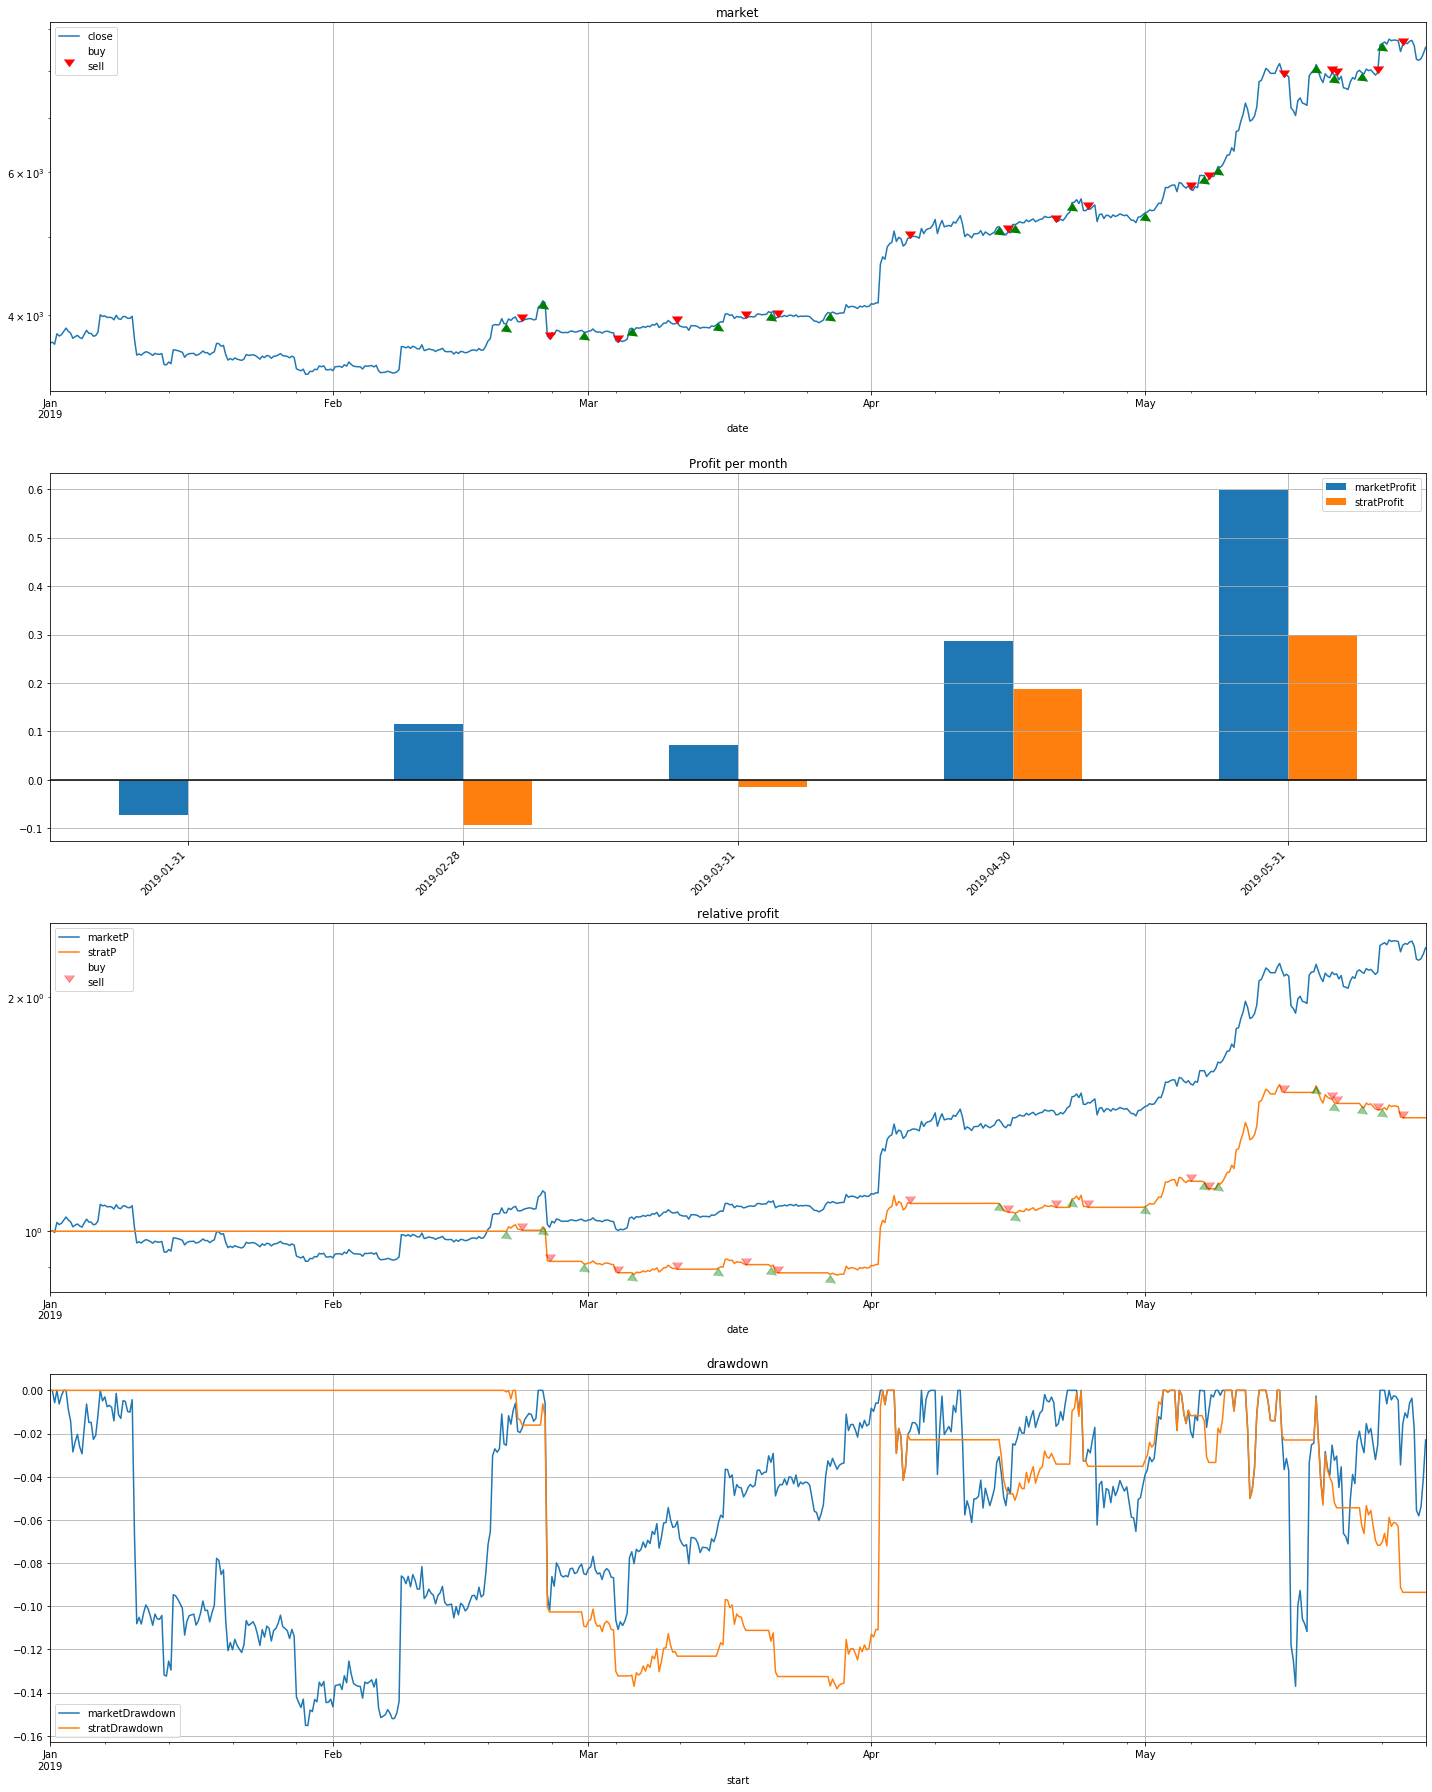

In [16]:
gekko.plot_stats(jdf, profits);